In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

## get the X_date, Y_target and change the Y_target to binary variables

In [2]:
def get_the_predicted_bugs(name, num1, num2, num3):
    X_data = pd.read_csv(name, usecols = [i for i in range(num1, num2)]).values
    Y_target = pd.read_csv(name, usecols = [num3]).values[:, 0]
    return [Y_target, X_data]

In [3]:
def change_to_binary(y):
    for i,j in enumerate(y):
        if j != 0: 
            y[i] = 1
    return y

In [7]:
y, x = get_the_predicted_bugs('all_data.csv', 2, 44, 44)
change_to_binary(y)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## RandomForestClassifier

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
def get_error_rate(x, y, method):
    err = 0
    for k in range(len(x)):
        if y[k] != method.predict([x[k]]):
            err += 1
    error_rate = err / len(x)
    return error_rate

In [141]:
get_error_rate(x_train, y_train, forest_clf), get_error_rate(x_test, y_test, forest_clf)

(0.014476614699331848, 0.1352253756260434)

In [142]:
forest_clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
err_rate_test_list = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
    forest_clf = RandomForestClassifier()
    forest_clf.fit(x_train, y_train)
    err_rate_train = get_error_rate(x_train, y_train, forest_clf)
    err_rate_test = get_error_rate(x_test, y_test, forest_clf)
    err_rate_test_list.append(err_rate_test)
    print("for the %d time, the error rate of the train set is %f and the error rate of the test set is %f" %(i, err_rate_train, err_rate_test))

for the 0 time, the error rate of the train set is 0.016704 and the error rate of the test set is 0.140234
for the 1 time, the error rate of the train set is 0.015590 and the error rate of the test set is 0.145242
for the 2 time, the error rate of the train set is 0.020045 and the error rate of the test set is 0.143573
for the 3 time, the error rate of the train set is 0.020045 and the error rate of the test set is 0.138564
for the 4 time, the error rate of the train set is 0.021158 and the error rate of the test set is 0.153589
for the 5 time, the error rate of the train set is 0.013363 and the error rate of the test set is 0.145242
for the 6 time, the error rate of the train set is 0.016704 and the error rate of the test set is 0.148581
for the 7 time, the error rate of the train set is 0.016704 and the error rate of the test set is 0.140234
for the 8 time, the error rate of the train set is 0.015590 and the error rate of the test set is 0.148581
for the 9 time, the error rate of the

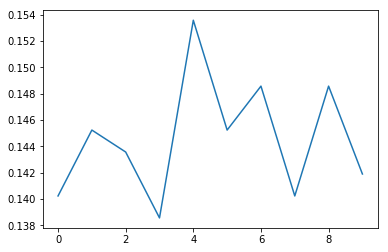

In [47]:
plt.plot(err_rate_test_list);

We found that by RandomForestClassifier, the error rate of the train set is very close to 0 while the error rate of the test set is still not small enough. We also found that the error rate of each time is not the same.

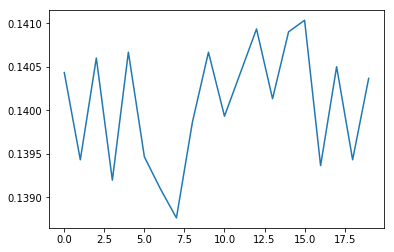

In [52]:
## 50 attemps
aver_err_rate_test_list = []
for i in range(20):
    err_rate_test_list = []
    for j in range(50):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier()
        forest_clf.fit(x_train, y_train)
        err_rate_train = get_error_rate(x_train, y_train, forest_clf)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot(aver_err_rate_test_list);

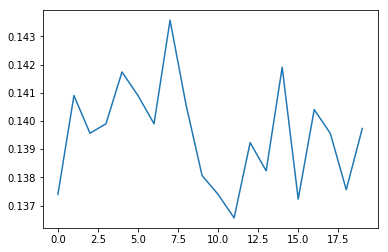

In [73]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(20):
    err_rate_test_list = []
    for j in range(10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier()
        forest_clf.fit(x_train, y_train)
        err_rate_train = get_error_rate(x_train, y_train, forest_clf)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot(aver_err_rate_test_list);

From the graphs above, we can observe that by increasing the attemp times, the average error rate seems to be more stable.
However, 50 attemps sometimes are too time_consuming. As a result, we choose to use the average error rate of 10 times as the final estimated error rate.

## Tuning the parameters 

## n_estimators

[0.20383973288814689,
 0.14273789649415694,
 0.13889816360601,
 0.1368948247078464,
 0.135559265442404,
 0.1360601001669449,
 0.13656093489148582,
 0.1352253756260434,
 0.1347245409015025,
 0.1342237061769616,
 0.135559265442404,
 0.1360601001669449,
 0.1343906510851419,
 0.1353923205342237,
 0.1342237061769616,
 0.1337228714524207,
 0.133889816360601,
 0.1345575959933222,
 0.1345575959933222,
 0.133889816360601,
 0.1347245409015025]

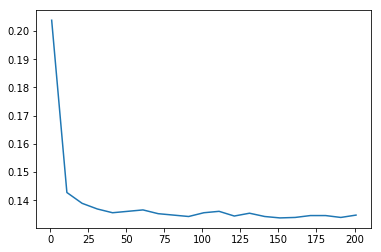

In [79]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(1, 202, 10):
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([i for i in range(1, 202, 10)], aver_err_rate_test_list);
aver_err_rate_test_list

The average error rate decreases with the increase of the n_estimators and tends to be stable when n_estimators is large enough. Finally, we choose n_estimators equals to 200.

## criterion

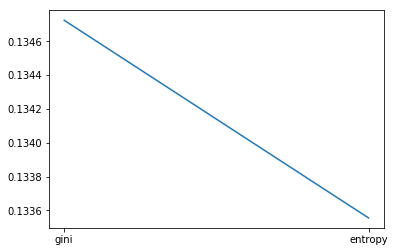

In [83]:
## 10 attemps
aver_err_rate_test_list = []
for i in ['gini', 'entropy']:
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot(['gini', 'entropy'], aver_err_rate_test_list);

The average error rate gets smaller when we choose criterion equals to entropy.

## max_features

[0.1332220367278798,
 0.13021702838063437,
 0.132220367278798,
 0.13205342237061768,
 0.13071786310517527,
 0.1337228714524207,
 0.1330550918196995,
 0.1327212020033389,
 0.1352253756260434,
 0.1352253756260434,
 0.1368948247078464,
 0.1370617696160267,
 0.1370617696160267,
 0.1387312186978297,
 0.1385642737896494,
 0.13806343906510848,
 0.1395659432387312]

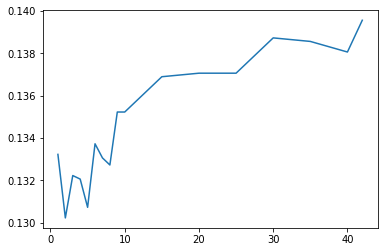

In [111]:
## 10 attemps
aver_err_rate_test_list = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 42]:
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 42], aver_err_rate_test_list);
aver_err_rate_test_list

From the graphs above, we can find that when max_features equals to 2, the average error rate reaches its minimum value. So we make max_features equals to 2. 

## max_depth

[0.13071786310517527,
 0.1315525876460768,
 0.13121869782971615,
 0.13105175292153587,
 0.1313856427378965,
 0.13288814691151918,
 0.13121869782971618,
 0.1327212020033389,
 0.13005008347245406,
 0.13105175292153587]

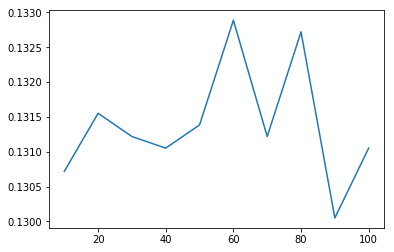

In [118]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(10, 101, 10):
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 2, max_depth = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([i for i in range(10, 101, 10)], aver_err_rate_test_list);
aver_err_rate_test_list

The max_depth has no significant effects on the average error rate, so we just use the default.

## min_samples_split

[0.13171953255425706,
 0.13038397328881468,
 0.12921535893155256,
 0.12971619365609346,
 0.13121869782971618,
 0.12954924874791318,
 0.13155258764607677,
 0.13071786310517527,
 0.13038397328881465]

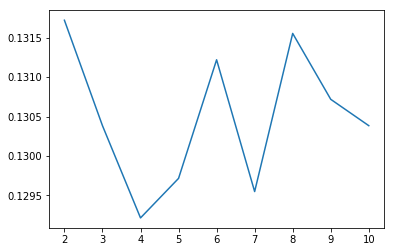

In [143]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(2, 11):
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 2, min_samples_split = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([i for i in range(2, 11)], aver_err_rate_test_list);
aver_err_rate_test_list

The min_samples_split has no significant effects on the average error rate, so we also just use the default.

## min_samples_leaf

[0.13155258764607675,
 0.13005008347245406,
 0.13071786310517527,
 0.13188647746243737,
 0.1313856427378965,
 0.132220367278798,
 0.133889816360601,
 0.1350584307178631,
 0.1357262103505843,
 0.1357262103505843]

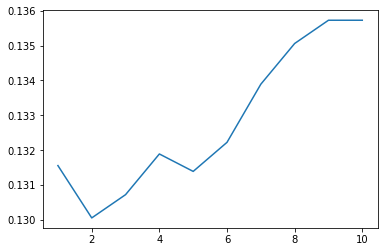

In [145]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(1, 11):
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 2, min_samples_leaf = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([i for i in range(1, 11)], aver_err_rate_test_list);
aver_err_rate_test_list

Generally the average error rate increases with the increase of the min_samples_leaf. So we choose min_samples_leaf equals to the default 1.

## max_leaf_nodes

[0.1328881469115192,
 0.13205342237061768,
 0.1313856427378965,
 0.13171953255425708,
 0.130550918196995,
 0.13071786310517525,
 0.130550918196995,
 0.133889816360601,
 0.13238731218697827,
 0.13171953255425708]

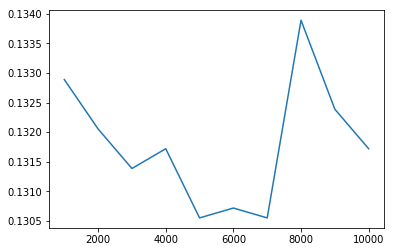

In [149]:
## 10 attemps
aver_err_rate_test_list = []
for i in range(1000, 10001, 1000):
    err_rate_test_list = []
    for j in range(10): 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
        forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 2, max_leaf_nodes = i)
        forest_clf.fit(x_train, y_train)
        err_rate_test = get_error_rate(x_test, y_test, forest_clf)
        err_rate_test_list.append(err_rate_test)
    aver_rate = np.mean(err_rate_test_list)
    aver_err_rate_test_list.append(aver_rate)
    
plt.plot([i for i in range(1000, 10001, 1000)], aver_err_rate_test_list);
aver_err_rate_test_list

The max_leaf_nodes has no significant effects on the average error rate, so we also just use the default.

As a result, we choose to apply the algorithm RandomForestClassifier and tune the parameters 'n_estimators = 200, criterion = 'entropy', max_features = 2'. The final average error rate we get is about 0.13.

In [158]:
## 50 attemps
err_rate_test_list = []
for j in range(50): 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
    forest_clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 2)
    forest_clf.fit(x_train, y_train)
    err_rate_test = get_error_rate(x_test, y_test, forest_clf)
    err_rate_test_list.append(err_rate_test)
aver_rate = np.mean(err_rate_test_list)

print("The final average error rata is %f." %(aver_rate))

The final average error rata is 0.131018.
